## Final Project Submission

Please fill out:
* Student name: Martin Kabare
* Student pace:  full time Remote
* Scheduled project review date/time:
* Instructor name: Faith
* Blog post URL:



# Project Overview

In this project, we utilized data cleaning, analysis, and visualization to investigate trends in airplane accidents from 1963-2023 and generate insights.

# Business Problem
The company I'm working with wants to start using airplanes for both business and private use. However, they're new to the aviation industry and aren't aware of the potential risks involved.

Since flying always comes with some level of risk, this project aims to find ways to make it as safe as possible for passengers. Ensuring passenger safety is crucial because a fatal accident could severely damage the company's reputation and finances.

##Load Dataset and Initial Exploration
We are loading the dataset and performing initial exploration to understand its structure, size, and basic statistics. This helps us get an overview of the data we are dealing with.

# Data Exploration and Cleaning
The dataset utilized for this analysis contains information about more than 90,000 civil aviation accidents in the United States from 1948-2022. It was obtained from the National Transportation Safety Board.
We are loading the dataset and performing initial exploration to understand its structure, size, and basic statistics. This helps us get an overview of the data we are dealing with.



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import warnings
warnings.filterwarnings('ignore')


In [5]:
# Load dataset
df = pd.read_csv('/content/AviationData.csv')

In [18]:
# Display the first 5 rows
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month.Abbr,Day.Abbr
10613,20001214X35598,Accident,NYC85FNC02,1985-01-01,"HOPKINTON, NH",United States,Unknown,Unknown,LEB,"LEBANON, NH",...,2.0,0.0,0.0,IMC,Approach,Probable Cause,NaN,1985,Jan,Tue
10614,20001214X35495,Accident,DEN85FA055,1985-01-01,"EDGEWOOD, NM",United States,Unknown,Unknown,Unknown,Unknown,...,0.0,0.0,0.0,IMC,Cruise,Probable Cause,NaN,1985,Jan,Tue
10615,20001214X35494,Accident,DCA85RA007,1985-01-01,"LA PAZ, Bolivia",Bolivia,Unknown,Unknown,LPB,LA PAZ INTERNATIONAL,...,0.0,0.0,0.0,UNK,NaN,Foreign,06-02-1995,1985,Jan,Tue
10616,20001214X35566,Accident,MIA85FA071,1985-01-01,"ODESSA, FL",United States,Unknown,Unknown,Unknown,Unknown,...,2.0,2.0,0.0,VMC,Maneuvering,Probable Cause,NaN,1985,Jan,Tue
10617,20001214X35463,Accident,ATL85LA075,1985-01-01,"DUBLIN, NC",United States,Unknown,Unknown,Unknown,Unknown,...,0.0,0.0,1.0,VMC,Cruise,Probable Cause,NaN,1985,Jan,Tue


In [7]:
# Check the shape of the DataFrame
df.shape

(49196, 31)

In [8]:
# Describe statistical data on numerical values
df.describe()

,Latitude,Longitude,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,100.000000,100.000000,47908.000000,48828.000000,48713.000000,48722.000000,48887.000000
mean,36.829661,-108.702531,1.153398,0.517797,0.215363,0.369443,4.394174
std,9.003640,22.859800,0.460103,4.807081,1.045598,2.661642,25.102801
min,1.483333,-173.240000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.332292,-119.769861,1.000000,0.000000,0.000000,0.000000,0.000000
50%,35.633889,-115.260833,1.000000,0.000000,0.000000,0.000000,1.000000
75%,39.941667,-85.705695,1.000000,0.000000,0.000000,0.000000,2.000000
max,70.333333,-70.233333,4.000000,349.000000,106.000000,380.000000,699.000000


##Missing Values and Data Cleaning
We identify and handle missing values by filling them with 'Unknown' for categorical data and the mode for numerical data. We also convert dates to a datetime format and create new time-related columns. Filtering out older data helps us focus on more relevant recent data.

In [22]:
# Check for missing values and calculate their percentage
missing_values = df.isnull().mean() * 100


In [23]:
# Columns in the DataFrame
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date', 'Year', 'Month.Abbr', 'Day.Abbr'],
      dtype='object')

In [24]:
# Fill NaN values with 'Unknown' for specific columns to handle missing categorical data
fill_unknown_cols = ['Event.Id', 'Accident.Number', 'Location', 'Airport.Code', 'Airport.Name', 'Aircraft.damage',
                     'Aircraft.Category', 'Make', 'Model', 'Amateur.Built', 'FAR.Description', 'Schedule', 'Air.carrier',
                     'Registration.Number', 'Latitude', 'Longitude', 'Weather.Condition', 'Injury.Severity']

for col in fill_unknown_cols:
    df[col].fillna('Unknown', inplace=True)

In [25]:
# Fill NaN values in 'Number.of.Engines' with the mode to handle missing numerical data
df['Number.of.Engines'].fillna(df['Number.of.Engines'].mode()[0], inplace=True)

In [26]:
# Convert 'Event.Date' to datetime and create new columns for year, month abbreviation, and day abbreviation
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
df['Year'] = df['Event.Date'].dt.year
df['Month.Abbr'] = df['Event.Date'].dt.strftime('%b')
df['Day.Abbr'] = df['Event.Date'].dt.strftime('%a')


In [27]:
# Filter out data before 1985 to focus on more relevant recent data
df = df[df['Year'] >= 1985]

In [28]:
# Check for missing values after cleaning to ensure data quality
missing_values_after_cleaning = df.isnull().sum()
missing_values_after_cleaning

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                    170
Latitude                     0
Longitude                    0
Airport.Code                 0
Airport.Name                 0
Injury.Severity              0
Aircraft.damage              0
Aircraft.Category            0
Registration.Number          0
Make                         0
Model                        0
Amateur.Built                0
Number.of.Engines            0
Engine.Type                 23
FAR.Description              0
Schedule                     0
Purpose.of.flight          112
Air.carrier                  0
Total.Fatal.Injuries       316
Total.Serious.Injuries     420
Total.Minor.Injuries       408
Total.Uninjured            283
Weather.Condition            0
Broad.phase.of.flight      998
Report.Status                1
Publication.Date          5611
Year                         0
Month.Ab

##Data Analysis and Visualization
We analyze the number of accidents per year to observe trends over time. This helps identify if safety has improved or deteriorated.

In [29]:
# Count the number of accidents per year
accidents_per_year = df['Year'].value_counts().sort_index()

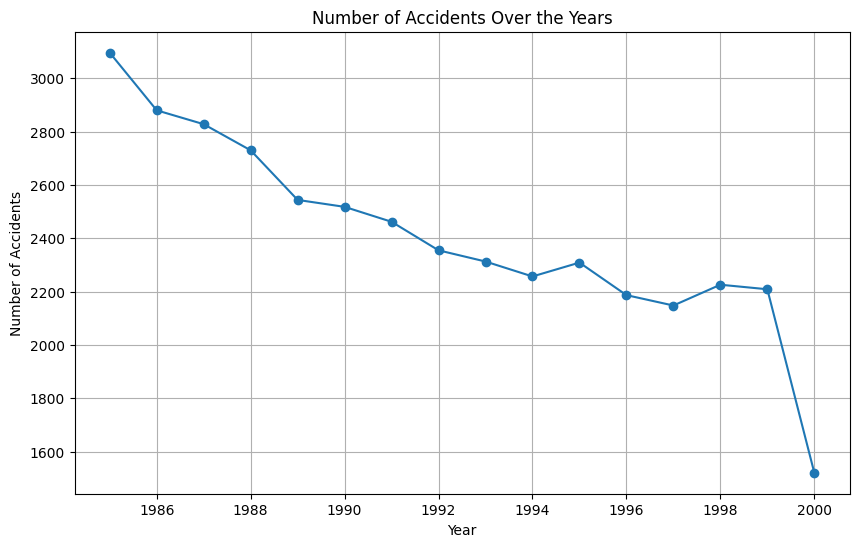

In [30]:
# Plot the number of accidents over the years to identify trends
plt.figure(figsize=(10, 6))
accidents_per_year.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents Over the Years')
plt.grid(True)
plt.show()

We analyze the number of accidents per year to observe trends over time. This helps identify if safety has improved or deteriorated.

#Accidents per Month

In [31]:
# Count the number of accidents per month and reindex to ensure proper order
accidents_per_month = df['Month.Abbr'].value_counts().reindex(list(calendar.month_abbr[1:]), fill_value=0)


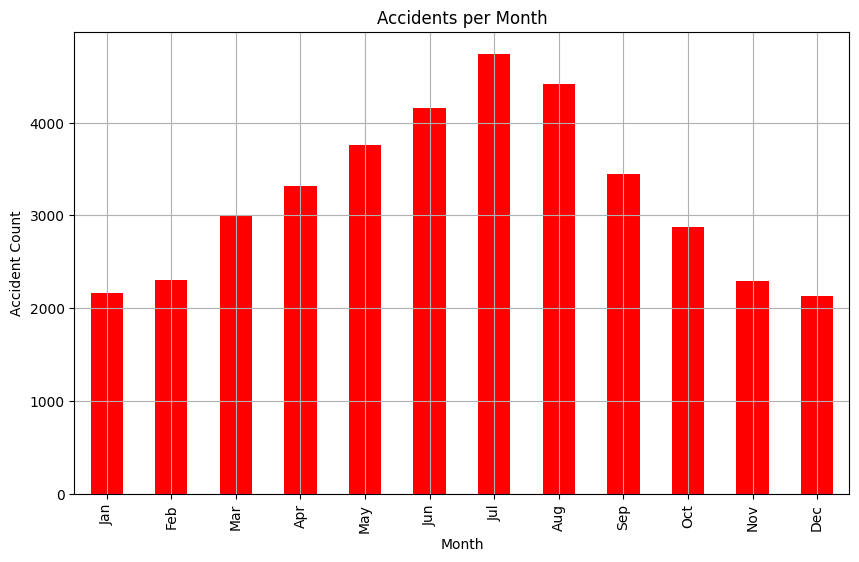

In [32]:
# Plot the number of accidents per month to identify seasonal patterns
plt.figure(figsize=(10, 6))
accidents_per_month.plot(kind='bar', color='red')
plt.xlabel('Month')
plt.ylabel('Accident Count')
plt.title('Accidents per Month')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

##Monthly Flight Counts by Year
We examine monthly flight counts by year to understand variations in flight activity over time and identify any trends that correlate with accident rates.

In [33]:
# Calculate the monthly flight counts for each year
monthly_flights = df.groupby(['Year', 'Month.Abbr']).size().unstack(fill_value=0)


In [34]:
# Reindex DataFrame to ensure proper chronological order of months
monthly_flights = monthly_flights.reindex(columns=calendar.month_abbr[1:])


In [35]:
# Transpose the DataFrame for better plotting
transposed_df = monthly_flights.T

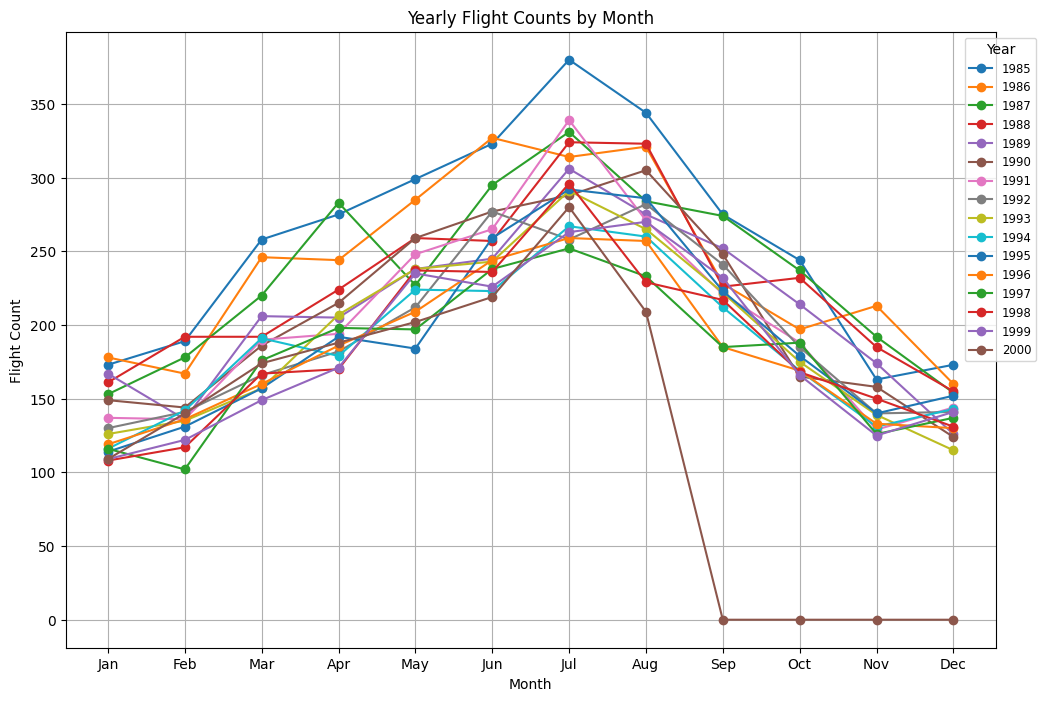

In [36]:
# Plot the monthly flight counts by year to see variations over months and years
plt.figure(figsize=(12, 8))
for year in transposed_df.columns:
    plt.plot(transposed_df.index, transposed_df[year], marker='o', label=year)
plt.title('Yearly Flight Counts by Month')
plt.xlabel('Month')
plt.ylabel('Flight Count')
plt.legend(title='Year', loc='upper right', bbox_to_anchor=(1.05, 1), fontsize='small')
plt.grid(True)
plt.show()

##Injury Severity
We examine the severity of injuries in accidents to understand their impact on passengers and crew. This helps in identifying the seriousness of accidents and prioritizing safety measures.

In [37]:
# Analyze the severity of injuries in accidents
df['Injury.Severity'] = df['Injury.Severity'].apply(lambda x: x.split('(')[0].strip())
injury_severity = df['Injury.Severity'].value_counts()

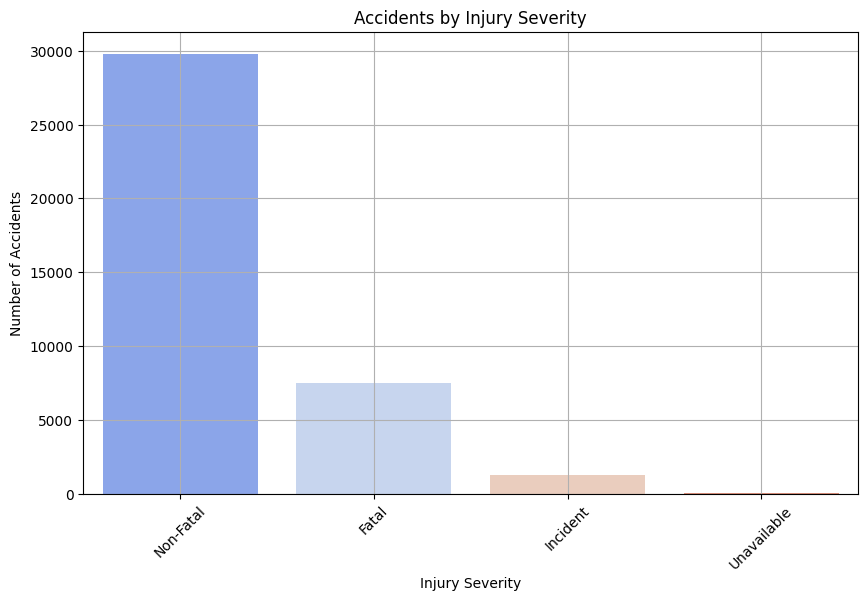

In [38]:
# Plot the distribution of injury severity to understand the impact of accidents on passengers
plt.figure(figsize=(10, 6))
sns.barplot(x=injury_severity.index, y=injury_severity.values, palette='coolwarm')
plt.xlabel('Injury Severity')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Injury Severity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##Accidents by Broad Phase of Flight
We analyze accidents by the broad phase of flight to see when they most commonly occur. This helps in identifying the most critical phases of flight that require more attention for safety improvements.

In [39]:
# Analyze the distribution of accidents by broad phase of flight
broad_phase = df['Broad.phase.of.flight'].value_counts()

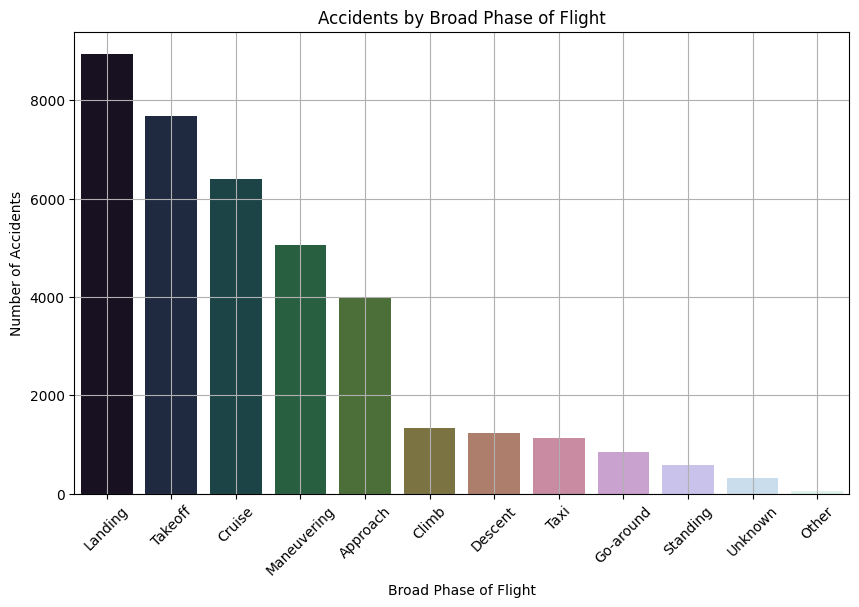

In [40]:
# Plot the distribution to identify during which phases most accidents occur
plt.figure(figsize=(10, 6))
sns.barplot(x=broad_phase.index, y=broad_phase.values, palette='cubehelix')
plt.xlabel('Broad Phase of Flight')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Broad Phase of Flight')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##Weather Conditions
We analyze the distribution of weather conditions during accidents to see which conditions are most common. This helps in understanding the impact of weather on accident rates.

In [41]:
# Analyze the distribution of weather conditions during accidents
weather_conditions = df['Weather.Condition'].value_counts()

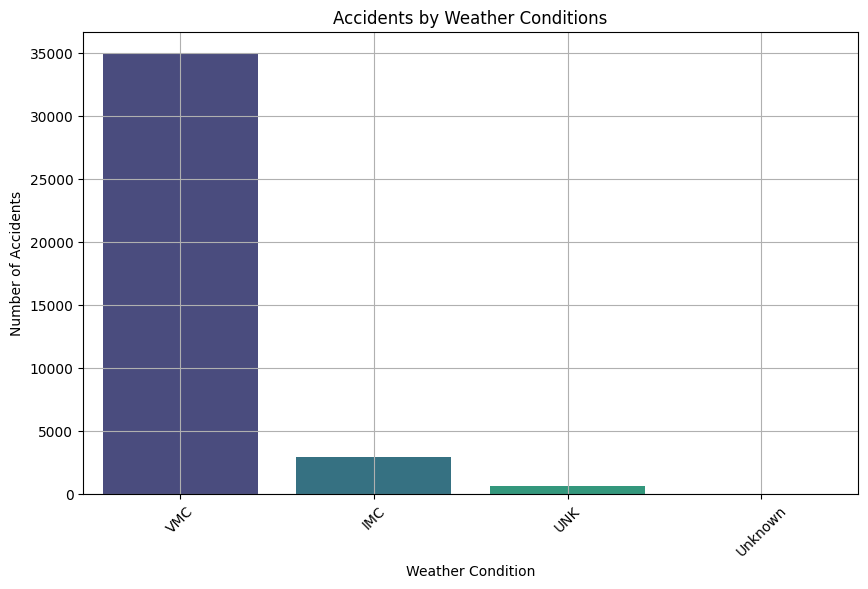

In [42]:
# Plot the distribution of weather conditions to see which conditions are most common during accidents
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_conditions.index, y=weather_conditions.values, palette='viridis')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Weather Conditions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##Accidents by Aircraft Make
We identify and visualize the top 10 aircraft makes involved in accidents to understand which brands have higher accident rates. This helps in making informed decisions about aircraft purchases.


In [43]:
# Identify the top 10 most common makes involved in accidents
top_makes = df['Make'].value_counts().nlargest(10)

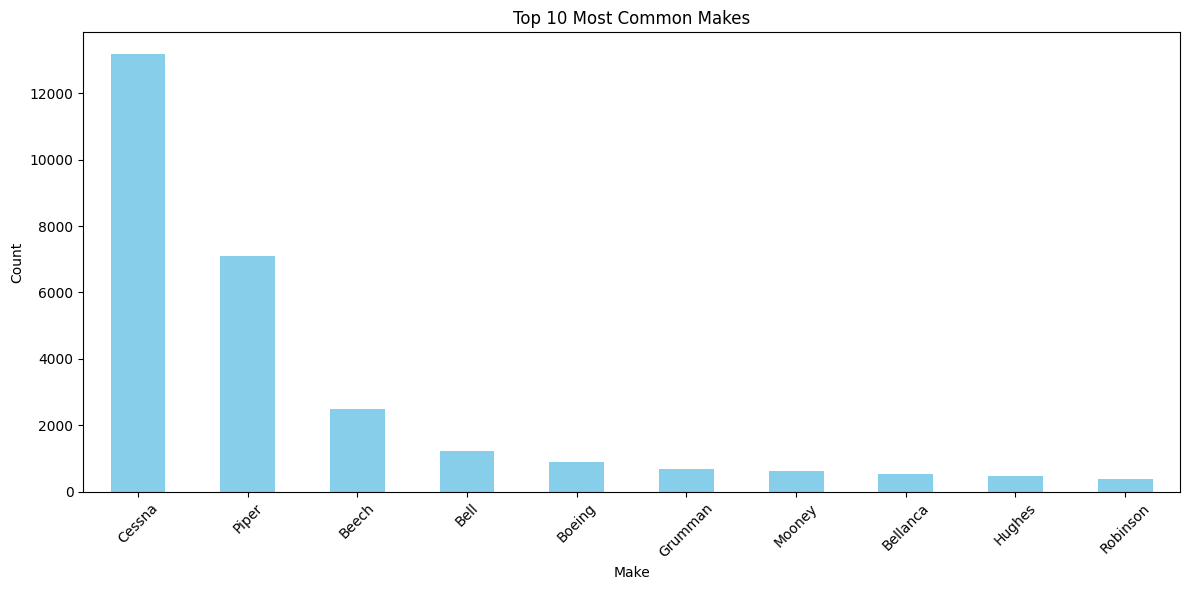

In [44]:
# Plot the top 10 makes to understand which aircraft brands have higher accident rates
plt.figure(figsize=(12, 6))
top_makes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Distribution of Number of Engines
We analyze the distribution of the number of engines in aircraft involved in accidents to see if certain types (e.g., single-engine vs. multi-engine) are more prone to accidents.

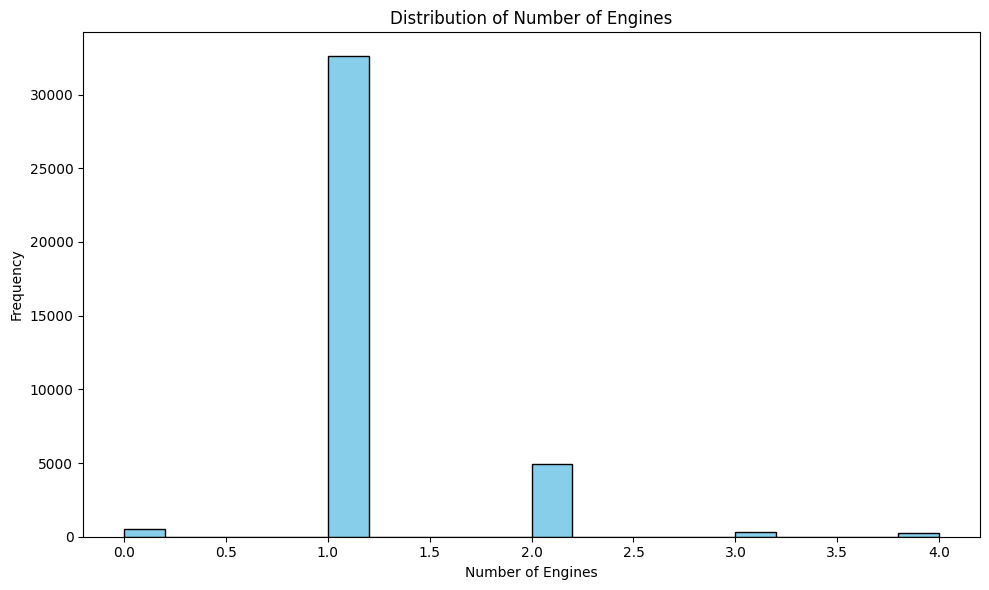

In [45]:
# Analyze the distribution of the number of engines in aircraft involved in accidents
plt.figure(figsize=(10, 6))
df['Number.of.Engines'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

##Identifying Low-Risk Aircraft
We calculate accident rates by make and model to identify aircraft with the lowest risk. This helps in making data-driven recommendations for purchasing safer aircraft.

###Accident Rates by Make and Model


We calculate accident rates by make and model to identify aircraft with the lowest risk. This helps in making data-driven recommendations for purchasing safer aircraft.

In [49]:
# Calculate accident rates by make and model
accident_rates = df.groupby(['Make', 'Model']).size().reset_index(name='Accident Count')
total_accidents = accident_rates['Accident Count'].sum()
accident_rates['Accident Rate'] = accident_rates['Accident Count'] / total_accidents

In [50]:
# Filter aircraft with low accident rates
low_accident_rate_aircraft = accident_rates[accident_rates['Accident Rate'] < 0.01]

In [52]:
# Combine Make and Model into a single column for better visualization
low_accident_rate_aircraft['Make_Model'] = low_accident_rate_aircraft['Make'] + ' ' + low_accident_rate_aircraft['Model']


In [53]:
# Sort the data by Accident Rate for better visualization
low_accident_rate_aircraft = low_accident_rate_aircraft.sort_values(by='Accident Rate', ascending=False)

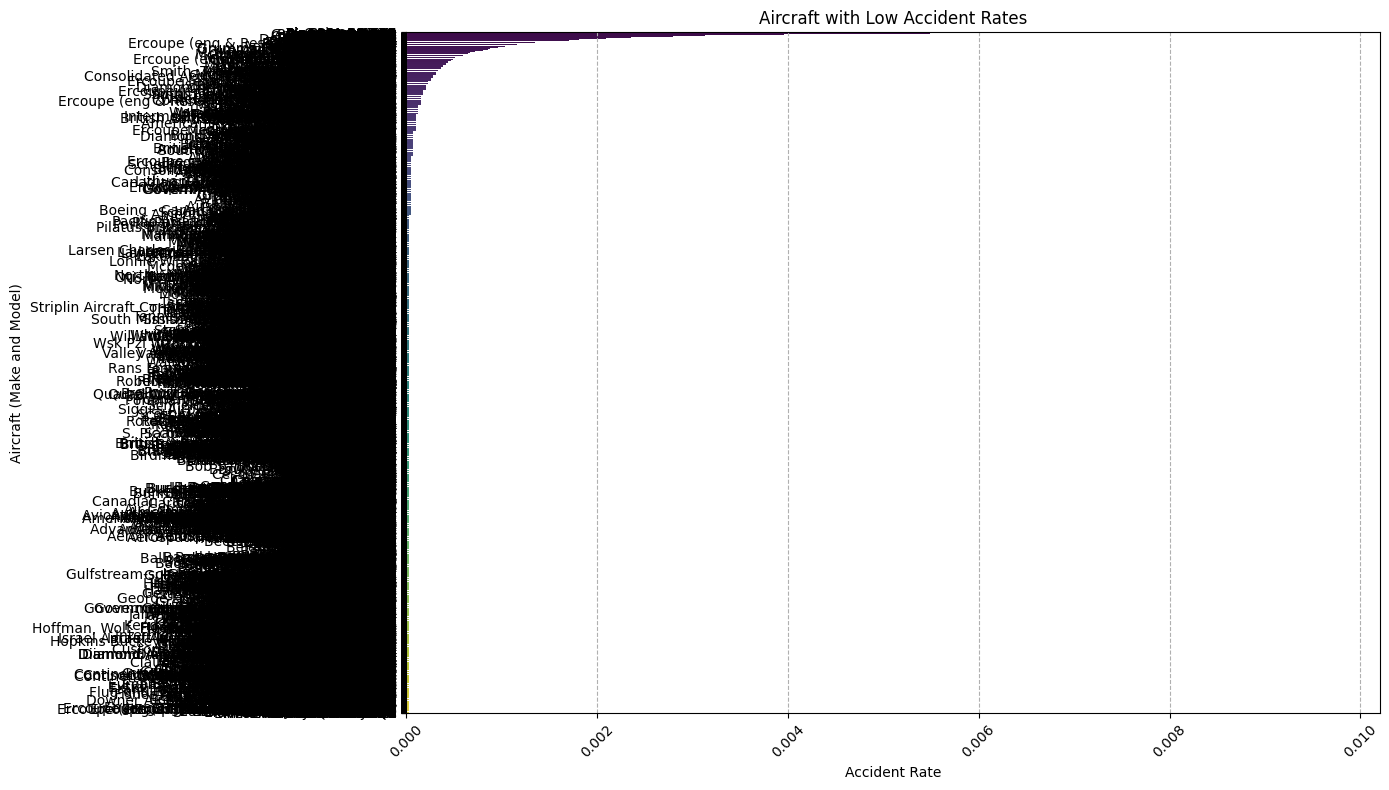

In [54]:
# Plot low accident rate aircraft
plt.figure(figsize=(14, 8))
sns.barplot(x='Accident Rate', y='Make_Model', data=low_accident_rate_aircraft, palette='viridis')
plt.xlabel('Accident Rate')
plt.ylabel('Aircraft (Make and Model)')
plt.title('Aircraft with Low Accident Rates')
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

# Insights and Recommendations


##Key Findings

1.   **Number of Accidents Over the Years**: There is a general decrease in the number of accidents over the years, indicating improvements in aviation safety standards and technologies.
2.   **Accidents per Month**: The highest number of accidents occurs in the summer months (June, July, and August), which could be due to increased air traffic during the vacation season.
3.   **Weather Conditions**: Most accidents occur under Visual Meteorological Conditions (VMC), suggesting that even in good weather, human error and mechanical failures play significant roles.
4.   **Injury Severity**: Non-fatal accidents are the most common, but there is still a significant number of fatal accidents, highlighting the importance of continuous safety improvements.
5.   **Broad Phase of Flight**: The majority of accidents occur during landing and takeoff, phases that are typically the most critical in flight operations.
6.   **Aircraft Make**: Cessna and Piper are the most common makes involved in accidents, likely due to their prevalence in general aviation.
7.   **Number of Engines**: Most aircraft involved in accidents have one engine, which may suggest a higher risk associated with single-engine aircraft.
8.   **Low-Risk Aircraft**: Aircraft with low accident rates are identified, which the company can consider for purchase.











##Recommendations

1.  **Focus on Safety During Critical Phases**: Enhance pilot training and safety measures specifically for the landing and takeoff phases.
2.  **Weather Monitoring and Decision Making**: Improve weather monitoring systems and decision-making protocols to reduce accidents under VMC.
3.  **Regular Maintenance and Inspections**: Ensure stringent maintenance and inspection routines, especially for single-engine aircraft.
4.  **Seasonal Safety Campaigns**: Conduct safety awareness campaigns during the summer months to address the higher accident rates.
5.  **Invest in Advanced Safety Technologies**: Invest in advanced avionics and safety technologies to further reduce the accident rates.

##Next Steps

1.  **Collect More Data**: Gather more data on recent years to continue monitoring trends and improvements.
2.  **Detailed Analysis of Specific Makes and Models**: Conduct a more detailed analysis of specific aircraft makes and models to identify particular risks.
3.  **Study Human Factors**: Investigate the role of human factors in accidents to develop targeted training and mitigation strategies.
4. **Collaborate with Regulatory Bodies**: Work closely with aviation regulatory bodies to implement and adhere to the latest safety standards and regulations.

#Conclusion

By focusing on these areas, the company can confidently enter the aircraft industry with a robust safety strategy, minimizing risks and ensuring safer operations. This approach not only aligns with our commitment to safety but also positions the company as a responsible and forward-thinking player in the aviation sector.